In [1]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the uber file present in our working dorectory
uber = pd.read_csv("Uber Request Data.csv",encoding='utf-8')
# displaying the first 10 lines of the data frame
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [3]:
# display the dimensions of the data set
uber.shape

(6745, 6)

In [4]:
# checking the datatype of columns
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [5]:
# counting the number of null values in the dataset if any
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
# finding the percentage of missing values
uber.isnull().sum()*100/uber.shape[0]

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [7]:
# converting the 'Request timestamp' column into str format to replace the '/' with '-'
uber['Request timestamp'] = uber['Request timestamp'].astype(str)

In [8]:
# converting the date into the proper fornmat, removing the / and replacing with '-'
uber['Request timestamp'] = uber['Request timestamp'].str.replace("/","-")
# converting the column format to datetime
uber['Request timestamp'] = pd.to_datetime(uber["Request timestamp"])

In [9]:
# Converting the Drop timestamp column to str type
uber['Drop timestamp'] = uber['Drop timestamp'].astype(str)

In [10]:
# converting all the sated into a standard form by removing '/' and replacing with '-'
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace("/","-")
# converting the Drop timestamp column to datetime 
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'])

In [11]:
# display the dataframe after changing the column types
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00


In [12]:
# displaying the information of the entire dataset after changing the data type of columns
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [13]:
# extracting the hours from the request timestamp
request_hour = uber['Request timestamp'].dt.hour
# adding the computed list into the present dataframe 
uber["Request_hour"] = request_hour
# displaying the top 5 columns of the dataframe
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [14]:
# Extracting the day from the request timestamp
request_day = uber['Request timestamp'].dt.day
# attaching the Request day column to the dataframe
uber['Request_day'] = request_day
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour,Request_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


C:\Users\Yuthika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Request hour V/S Request day w.r.t Status')

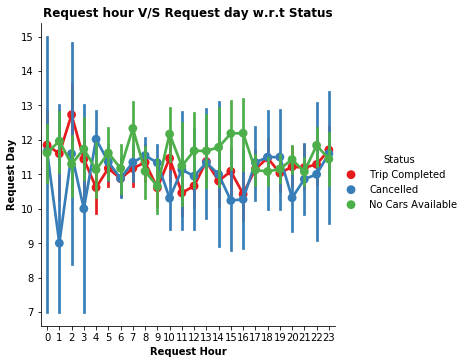

In [15]:
# plotting the hour and day on the barplot w.r.t Status of the cabs
sns.catplot(x='Request_hour',y="Request_day",hue='Status',data=uber,kind="point",palette='Set1')
plt.xlabel('Request Hour',fontweight='bold')
plt.ylabel("Request Day",fontweight='bold')
plt.title('Request hour V/S Request day w.r.t Status',fontweight='bold')

Text(0.5, 1.0, 'Request Hour V/S Pickup Point')

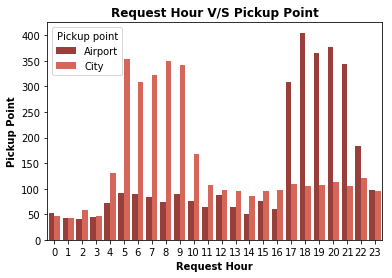

In [16]:
# plotting the request hour versus the pickup point
sns.countplot(x="Request_hour", hue='Pickup point', data=uber, palette="Reds_d")
# setting the x label
plt.xlabel("Request Hour",fontweight="bold")
# setting up the y label
plt.ylabel("Pickup Point",fontweight="bold")
# setting the title of the plot
plt.title("Request Hour V/S Pickup Point",fontweight="bold")

In [17]:
# dividing the dataframe based on various time slots of the day
def time_of_the_day(x):
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 12:
        return "Morning"
    elif 12 <= x < 17:
        return "Afternoon"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late Night"

# adding the time of the day just calculated to the main dataframe
uber['Time_of_the_day'] = uber['Request_hour'].apply(lambda x: time_of_the_day(x))

In [18]:
# displaying the dataframe after dividing the entire dataframe into various time slots(" early morning, morning, afternoon, evening, late night")
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour,Request_day,Time_of_the_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning


In [19]:
# counting the number of values in the 'time_of_the_day' column
uber['Time_of_the_day'].value_counts()

Morning          2517
Evening          2342
Afternoon         810
Early Morning     578
Late Night        498
Name: Time_of_the_day, dtype: int64

Text(0.5, 1.0, 'Duration of the day V/S Status of Cabs')

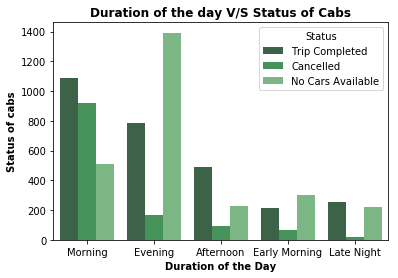

In [20]:
# plotting the graph for various times of the day versus the status of the trip
sns.countplot(x='Time_of_the_day', hue='Status', data=uber, palette="Greens_d")
# setting the x label
plt.xlabel('Duration of the Day',fontweight="bold")
# setting the y label
plt.ylabel("Status of cabs",fontweight='bold')
# setting the title of the plot
plt.title("Duration of the day V/S Status of Cabs",fontweight='bold')

In [21]:
# subsetting the data frame based on the duration of the day ( which we just created) and adding it to the main dataframe
Early_morning_slot = uber[uber['Time_of_the_day'] == "Early Morning"]
# displaying the early_morning slot dataframe
Early_morning_slot.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour,Request_day,Time_of_the_day
12,2784,Airport,2.0,Trip Completed,2016-07-13 04:49:20,2016-07-13 05:23:03,4,13,Early Morning
26,5434,City,3.0,Trip Completed,2016-07-15 02:41:38,2016-07-15 03:24:43,2,15,Early Morning
34,4075,City,4.0,Trip Completed,2016-07-14 02:17:35,2016-07-14 03:21:38,2,14,Early Morning
53,4081,Airport,6.0,Trip Completed,2016-07-14 02:37:14,2016-07-14 03:30:27,2,14,Early Morning
56,6758,Airport,6.0,Trip Completed,2016-07-15 00:03:39,2016-07-15 01:07:39,0,15,Early Morning


Text(0.5, 1.0, 'Early Morning Duration(before 5am) V/S Status of Cabs')

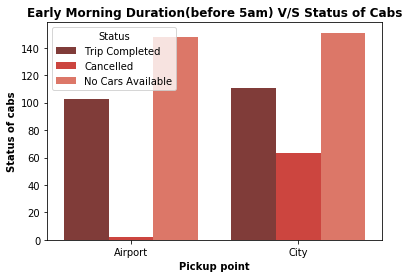

In [22]:
# plotting a graph to show the pickup point with respect to the status of the cabs in the early morning slot
sns.countplot(x='Pickup point',hue='Status',data=Early_morning_slot,palette='Reds_d')
# setting up  the x label
plt.xlabel('Pickup point',fontweight="bold")
# setting up the y label
plt.ylabel("Status of cabs",fontweight='bold')
# setting the title for the graph
plt.title("Early Morning Duration(before 5am) V/S Status of Cabs",fontweight='bold')

In [23]:
# subsetting the dataframe and selecting only the Morning time slot
Morning_slot = uber[uber['Time_of_the_day'] == "Morning"]
Morning_slot.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour,Request_day,Time_of_the_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Morning
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning


Text(0.5, 1.0, 'Morning Duration(5am to 12 pm) V/S Status of Cabs')

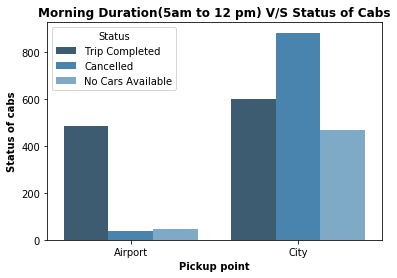

In [24]:
# plotting the pickup point w.r.t status of the trip in the morning slot
sns.countplot(x='Pickup point',hue='Status',data=Morning_slot,palette='Blues_d')
# setting the x label
plt.xlabel('Pickup point',fontweight="bold")
# setting the y label
plt.ylabel("Status of cabs",fontweight='bold')
# setting the title of the graph
plt.title("Morning Duration(5am to 12 pm) V/S Status of Cabs",fontweight='bold')

In [25]:
# displaying the count of trips which were cancelled in the morning slot where pickup was from Airport
Morning_slot.loc[(Morning_slot['Pickup point']=='Airport') & (Morning_slot['Status'] == 'Cancelled')].shape[0]

37

In [26]:
# displaying the count of trips which were completed in the morning slot where pickup was from Airport
Morning_slot.loc[(Morning_slot['Pickup point']=='Airport') & (Morning_slot['Status'] == 'Trip Completed')].shape[0]

484

In [27]:
# displaying the count of status where ' no cars were available' in the morming slot where pickup was from Airport
Morning_slot.loc[(Morning_slot['Pickup point']=='Airport') & (Morning_slot['Status'] == 'No Cars Available')].shape[0]

44

In [28]:
# displaying the count of trips which were cancelled in the morning slot where pickup was from City
Morning_slot.loc[(Morning_slot['Pickup point']=='City') & (Morning_slot['Status'] == 'Cancelled')].shape[0]

883

In [29]:
# displaying the count of trips which were completed in the morning slot where pickup was from City
Morning_slot.loc[(Morning_slot['Pickup point']=='City') & (Morning_slot['Status'] == 'Trip Completed')].shape[0]

601

In [30]:
# displaying the count of status where ' no cars were available' in the morming slot where pickup was from City
Morning_slot.loc[(Morning_slot['Pickup point']=='City') & (Morning_slot['Status'] == 'No Cars Available')].shape[0]

468

In [31]:
# subsetting the dataframe and selecting only the Afternoon time slot
Afternoon_slot = uber[uber['Time_of_the_day'] == "Afternoon"]
Afternoon_slot.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour,Request_day,Time_of_the_day
11,1983,City,2.0,Trip Completed,2016-12-07 12:30:00,2016-12-07 12:57:00,12,7,Afternoon
14,3379,City,2.0,Trip Completed,2016-07-13 14:23:02,2016-07-13 15:35:18,14,13,Afternoon
16,4652,City,2.0,Trip Completed,2016-07-14 12:01:02,2016-07-14 12:36:46,12,14,Afternoon
21,2083,Airport,3.0,Trip Completed,2016-12-07 15:46:00,2016-12-07 16:40:00,15,7,Afternoon
28,669,City,4.0,Trip Completed,2016-11-07 13:08:00,2016-11-07 13:49:00,13,7,Afternoon


Text(0.5, 1.0, 'Afternoon Duration(12pm to 5 pm) V/S Status of Cabs')

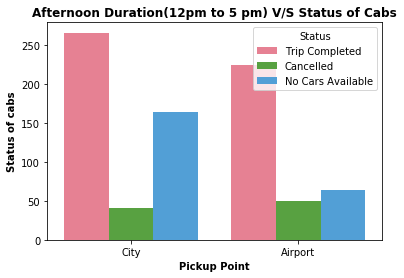

In [32]:
# subsetting the dataframe and selecting only the Afternoon time slot
sns.countplot(x='Pickup point',hue='Status',data=Afternoon_slot,palette='husl')
# setting the x label
plt.xlabel('Pickup Point',fontweight="bold")
# setting the y label
plt.ylabel("Status of cabs",fontweight='bold')
# setting the plot title
plt.title("Afternoon Duration(12pm to 5 pm) V/S Status of Cabs",fontweight='bold')

In [33]:
# subsetting the dataframe and selecting only the Evening time slot
Evening_slot = uber[uber['Time_of_the_day'] == "Evening"]
# displaying the evening time slot dataframe
Evening_slot.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour,Request_day,Time_of_the_day
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Evening
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Evening
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening


Text(0.5, 1.0, 'Evening Duration(5pm to 10pm) V/S Status of Cabs')

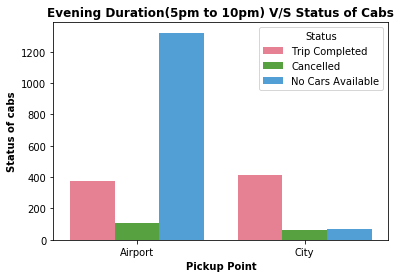

In [34]:
# plotting the Pickup point versus the Status during the evening 
sns.countplot(x='Pickup point',hue='Status',data=Evening_slot,palette='husl')
# setting the x label
plt.xlabel('Pickup Point',fontweight="bold")
# setting the y label
plt.ylabel("Status of cabs",fontweight='bold')
# setting the title for the plot
plt.title("Evening Duration(5pm to 10pm) V/S Status of Cabs",fontweight='bold')

In [35]:
# displaying the count of trips which were cancelled in the evening slot where pickup was from Airport
Evening_slot.loc[(Evening_slot['Pickup point']=='Airport') & (Evening_slot['Status'] == 'Cancelled')].shape[0]

106

In [36]:
# displaying the count of trips which were completed in the evening slot where pickup was from Airport
Evening_slot.loc[(Evening_slot['Pickup point']=='Airport') & (Evening_slot['Status'] == 'Trip Completed')].shape[0]

373

In [37]:
# displaying the count of status where ' no cars were available' in the evening slot where pickup was from Airport
Evening_slot.loc[(Evening_slot['Pickup point']=='Airport') & (Evening_slot['Status'] == 'No Cars Available')].shape[0]

1321

In [38]:
# displaying the count of trips which were cancelled in the evening slot where pickup was from City
Evening_slot.loc[(Evening_slot['Pickup point']=='City') & (Evening_slot['Status'] == 'Cancelled')].shape[0]

60

In [39]:
# displaying the count of trips which were completed in the evening slot where pickup was from City
Evening_slot.loc[(Evening_slot['Pickup point']=='City') & (Evening_slot['Status'] == 'Trip Completed')].shape[0]

411

In [40]:
# displaying the count of status where ' no cars were available' in the evening slot where pickup was from City
Evening_slot.loc[(Evening_slot['Pickup point']=='City') & (Evening_slot['Status'] == 'No Cars Available')].shape[0]

71

In [41]:
# subsetting the data based on the pickup points and status during late night hours i.e after 2200 hours
Late_night_slot = uber[uber['Time_of_the_day'] == "Late Night"]
Late_night_slot.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour,Request_day,Time_of_the_day
17,5335,Airport,2.0,Trip Completed,2016-07-14 22:24:13,2016-07-14 23:18:52,22,14,Late Night
48,6690,Airport,5.0,Trip Completed,2016-07-15 22:41:41,2016-07-15 23:51:00,22,15,Late Night
60,1273,Airport,7.0,Trip Completed,2016-11-07 22:07:00,2016-11-07 23:12:00,22,7,Late Night
75,1346,Airport,9.0,Trip Completed,2016-11-07 23:39:00,2016-12-07 00:23:00,23,7,Late Night
81,4023,City,9.0,Trip Completed,2016-07-13 23:58:41,2016-07-14 00:58:39,23,13,Late Night


Text(0.5, 1.0, 'Late night (after 10pm) V/S Status of Cabs')

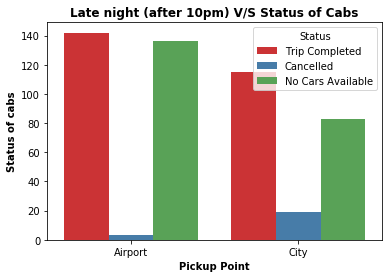

In [42]:
# plotting the pickup point versus the status of cabs during late night hours
sns.countplot(x='Pickup point',hue='Status',data=Late_night_slot,palette='Set1')
# setting the x label
plt.xlabel('Pickup Point',fontweight="bold")
# setting the y label
plt.ylabel("Status of cabs",fontweight='bold')
# setting the title of the plot
plt.title("Late night (after 10pm) V/S Status of Cabs",fontweight='bold')